# Hồi quy tuyến tính
*Hoàn thành toàn bộ phần bài tập trong notebook này, bao gồm toàn bộ kết quả đầu ra và code hỗ trợ.*

***"Không có một sự kiện nào trên đời là ngẫu nhiên, những thứ đang cho là ngẫu nhiên chỉ là những sự kiện ta chưa tìm ra được mô hình để biểu diễn quy luật của chúng".***

Xây dựng mô hình **Hồi quy tuyến tính** bao gồm hai phần:
- Trong quá trình huấn luyện, bộ phân lớp lấy dữ liệu huấn luyện và và học các tham số mô hình.
- Trong quá trình kiếm tra, mô hình phân lớp từng đối tượng bằng cách nhân giá trị của mẫu với các tham số mô hình để tìm ra giá trị của nhãn.
- Giá trị của tham số được kiểm định chéo.
Trong bài tập này, bạn sẽ cài đặt những bước trên và hiểu được qui trình Xây dựng một mô hình đơn giản với Học tham số, kiểm định chéo, và hiểu được cách viết code hiệu quả với vectorize.

Bài toán dự đoán giá nhà Boston được sử dụng trong bài tập này.

In [2]:
# Import một số thư viện cần thiết.
import random
import numpy as np
from sklearn import datasets as datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

# Sử dụng một mẹo nhỏ để vẽ hình trên cùng một dòng thay vì mở cửa sổ mới
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # đặt kích thước mặc định cho hình
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Một mẹo nhỏ để notebook tự load lại các module bên ngoài;
# xem thêm tại http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Tải dữ liệu Giá nhà Boston từ Scikit-learn.
boston = datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, \
                                                    boston.target, test_size=0.2)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (404, 13)
Training labels shape:  (404,)
Test data shape:  (102, 13)
Test labels shape:  (102,)


## Load dữ liệu
Hồi qui tuyến tính đơn giản là một cách tiếp cận để dự đoán phản ứng (giá trị đầu ra) khi dữ liệu có một đặc trưng duy nhất. Khi giả sử hai biến $x$ và $y$ liên hệ tuyến  tính thì mục tiêu của mô hình là cố tìm ra đường tuyến tính tốt nhất để dự đoán phản ứng ($y$). 

Đường đó được gọi là đường hồi quy.

Công thức cho đường hồi quy được biểu diễn như sau:
$$ \hat{Y} = h(X) = XW$$
Trong đó: 

- $X$ là ma trận có kích thước $N \times D$ với $X_{ij}$ là giá trị của đặc trưng thứ $j$ của mẫu $i$.
- $W$ là ma trận tham số có kích thước $D \times 1$
- $Y$ là giá trị phản ứng của $N$ mẫu.



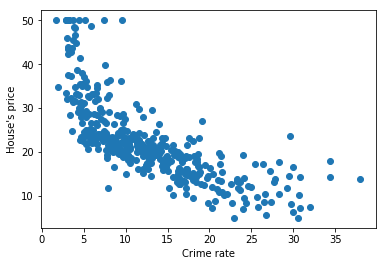

In [4]:
# Biểu diễn một số ví dụ trong tập huấn luyện sử dụng một đặc trưng duy nhất.
# LSTAT - % lower status of the population
plt.scatter(X_train[:,12], y_train)
plt.xlabel("Crime rate")
plt.ylabel("House's price")
plt.show()

## Huấn luyện mô hình
Tất cả code cho phần bài tập này được lưu trong tệp **models/linear_regression.py** và **models/linear_loss.py**.
### Cập nhật tham số
Quá trình huấn luyện mô hình thực chất là từ dữ liệu để học ra tham số mô hình phù hợp nhất với mô hình sinh dữ liệu. Trong mô hình hồi quy tuyến tính, ta cần học tham số $W$.

Khi khởi tạo mô hình, ta giả sử tham số được khởi tạo ngẫu nhiên. Sử dụng tham số $W$ đó, ta ước lượng được giá trị $Y$:
$$ \hat{y} = h(X) = WX $$

Tổng sai số, độ lệch của giá trị dự đoán so với giá trị thực tế gọi là hàm giá trị (Cost function):
$$ J(w) = \frac{1}{2N}\sum_{i=1}^{N} (\hat{y}_i - y_i)^2 = \frac{1}{2N}\sum_{i=1}^{N} (w_ix_i - y_i)^2$$


Chúng ta sử thuật toán **xuống đồi (Gradient descent)** để tối ưu tham số $W$. (Xem khóa [Machine Learning](https://www.coursera.org/learn/machine-learning/))

Đột tụt dốc của tham số $W$ được cập nhật theo công thức:
$$ dw_i = \frac{\partial}{\partial w_i}J(w)$$

Đầu tiên, mở file ```models/linear_loss.py``` và cài đặt hàm ```linear_loss_naive```, sử dụng vòng lặp để tính hàm giá trị (Cost function).

In [5]:
from models.linear_loss import linear_loss_naive
import time

# sinh ngẫu nhiên các trọng số (W) với các giá trị nhỏ
W = np.random.randn(13, ) * 0.0001 

loss, grad = linear_loss_naive(W, X_test, y_test, 0.00001)
print('loss: %f' % (loss, ))

loss: 294.769921


Lúc này, các giá trị gradient được trả về đều bằng 0. Đạo hàm và tính gradient theo công thức được cho ở trên trong cùng hàm ```linear_loss_naive```. Bạn sẽ thấy một số thứ hữu ích trong phần cài đặt trước đó.

Để đảm bảo là bạn đã cài đặt đúng, chúng ta sẽ sử dụng hàm ```grad_check_sparse``` (đã được cài đặt sẵn) để kiểm tra.

In [6]:
# Bởi vì bạn đã cài đặt hàm gradient, tính toán gradient với code dưới đây và
# kiểm tra với hàm grad_check_sparse(...) đã cho.

# Tính toán loss và grad với W.
loss, grad = linear_loss_naive(W, X_test, y_test, 0.0)

# Tính toán gradient theo một số chiều ngẫu nhiên và so sánh chúng với kết quả
# của bạn. Giá trị phải gần như chính xác theo tất cả các chiều.
from models.gradient_check import grad_check_sparse
f = lambda w: linear_loss_naive(w, X_test, y_test, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# thực hiện kiểm tra khi có sử dụng regularization
# đừng quên cài đặt gradient với regularization nhé.
loss, grad = linear_loss_naive(W, X_test, y_test, 1e2)
f = lambda w: linear_loss_naive(w, X_test, y_test, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# Kết quả relative error trong khoảng 1e-12

numerical: -241.043871 analytic: -241.043871, relative error: 1.676935e-11
numerical: -84.809857 analytic: -84.809857, relative error: 6.763237e-11
numerical: -57.589207 analytic: -57.589207, relative error: 3.216197e-11
numerical: -1523.338934 analytic: -1523.338934, relative error: 2.343383e-14
numerical: -409.141037 analytic: -409.141037, relative error: 6.247842e-13
numerical: -215.900423 analytic: -215.900423, relative error: 6.519209e-12
numerical: -3.510328 analytic: -3.510328, relative error: 3.218826e-10
numerical: -57.589207 analytic: -57.589207, relative error: 3.216197e-11
numerical: -3.510328 analytic: -3.510328, relative error: 3.218826e-10
numerical: -274.636156 analytic: -274.636156, relative error: 1.815811e-12
numerical: -409.141026 analytic: -409.141026, relative error: 1.492633e-12
numerical: -146.175581 analytic: -146.175581, relative error: 2.564798e-11
numerical: -244.348439 analytic: -244.348439, relative error: 1.857635e-11
numerical: -8911.953748 analytic: -89

In [7]:
# Kế tiếp, cài đặt linear_loss_vectorized; hiện tại chỉ tính toán hàm giá trị;
# gradient sẽ cài đặt sau.
tic = time.time()
loss_naive, grad_naive = linear_loss_naive(W, X_test, y_test, 0.00001)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

# Vectorized
from models.linear_loss import linear_loss_vectorized
tic = time.time()
loss_vectorized, _ = linear_loss_vectorized(W, X_test, y_test, 0.00001)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# Hàm giá trị khi vectorized nên có cùng giá trị với giá trị được tính bằng hàm
# linear_loss_naive() nhưng tính toán nhanh hơn
print('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 2.947699e+02 computed in 0.001502s
Vectorized loss: 2.947699e+02 computed in 0.005484s
difference: 0.000000


In [8]:
# Hoàn thiện phần cài đặt của linear_loss_vectorized, và tính toán gradient theo
# cách vectorized.

# Hai hàm tính loss và gradient nên cho kết quả giống nhau nhưng bản vectorized 
# tính toán nhanh hơn.
tic = time.time()
_, grad_naive = linear_loss_naive(W, X_test, y_test, 0.00001)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = linear_loss_vectorized(W, X_test, y_test, 0.00001)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

# So sánh gradient
difference = np.linalg.norm(grad_naive - grad_vectorized)
print('difference: {}'.format(difference))

Naive loss and gradient: computed in 0.002001s
Vectorized loss and gradient: computed in 0.000000s
difference: 2.606103768001348e-13


### Huấn luyện với hàm cập nhật
Sử dụng các hàm ```loss``` đã cài đặt ở trên để cài đặt hàm ```train``` trong tệp **linear_regression.py**.

Tham số W được cập nhật từng thành phần theo công thức:
$$ w_i =  w_i -\alpha\frac{\partial}{\partial w_i}J(w)$$

In [9]:
# Ở trong tệp linear_regression.py, cài đặt hàm LinearRegression.train() và chạy
# hàm đó với code sau
from models.linear_regression import LinearRegression
clf = LinearRegression()
tic = time.time()
loss_hist = clf.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=150000, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 150000: loss 287.487854
iteration 100 / 150000: loss 60.392558
iteration 200 / 150000: loss 53.259228
iteration 300 / 150000: loss 49.003306
iteration 400 / 150000: loss 46.310625
iteration 500 / 150000: loss 44.600179
iteration 600 / 150000: loss 43.507267
iteration 700 / 150000: loss 42.802686
iteration 800 / 150000: loss 42.342385
iteration 900 / 150000: loss 42.035831
iteration 1000 / 150000: loss 41.826124
iteration 1100 / 150000: loss 41.677498
iteration 1200 / 150000: loss 41.567475
iteration 1300 / 150000: loss 41.481924
iteration 1400 / 150000: loss 41.411960
iteration 1500 / 150000: loss 41.351997
iteration 1600 / 150000: loss 41.298521
iteration 1700 / 150000: loss 41.249320
iteration 1800 / 150000: loss 41.203001
iteration 1900 / 150000: loss 41.158686
iteration 2000 / 150000: loss 41.115819
iteration 2100 / 150000: loss 41.074048
iteration 2200 / 150000: loss 41.033149
iteration 2300 / 150000: loss 40.992980
iteration 2400 / 150000: loss 40.953446
iteration 2

iteration 20500 / 150000: loss 37.791515
iteration 20600 / 150000: loss 37.784181
iteration 20700 / 150000: loss 37.776895
iteration 20800 / 150000: loss 37.769657
iteration 20900 / 150000: loss 37.762468
iteration 21000 / 150000: loss 37.755326
iteration 21100 / 150000: loss 37.748232
iteration 21200 / 150000: loss 37.741184
iteration 21300 / 150000: loss 37.734182
iteration 21400 / 150000: loss 37.727226
iteration 21500 / 150000: loss 37.720316
iteration 21600 / 150000: loss 37.713450
iteration 21700 / 150000: loss 37.706629
iteration 21800 / 150000: loss 37.699852
iteration 21900 / 150000: loss 37.693119
iteration 22000 / 150000: loss 37.686429
iteration 22100 / 150000: loss 37.679782
iteration 22200 / 150000: loss 37.673178
iteration 22300 / 150000: loss 37.666615
iteration 22400 / 150000: loss 37.660095
iteration 22500 / 150000: loss 37.653615
iteration 22600 / 150000: loss 37.647177
iteration 22700 / 150000: loss 37.640780
iteration 22800 / 150000: loss 37.634422
iteration 22900 

iteration 41900 / 150000: loss 36.885446
iteration 42000 / 150000: loss 36.883062
iteration 42100 / 150000: loss 36.880687
iteration 42200 / 150000: loss 36.878323
iteration 42300 / 150000: loss 36.875968
iteration 42400 / 150000: loss 36.873624
iteration 42500 / 150000: loss 36.871289
iteration 42600 / 150000: loss 36.868965
iteration 42700 / 150000: loss 36.866650
iteration 42800 / 150000: loss 36.864344
iteration 42900 / 150000: loss 36.862049
iteration 43000 / 150000: loss 36.859763
iteration 43100 / 150000: loss 36.857487
iteration 43200 / 150000: loss 36.855220
iteration 43300 / 150000: loss 36.852962
iteration 43400 / 150000: loss 36.850714
iteration 43500 / 150000: loss 36.848475
iteration 43600 / 150000: loss 36.846246
iteration 43700 / 150000: loss 36.844026
iteration 43800 / 150000: loss 36.841815
iteration 43900 / 150000: loss 36.839613
iteration 44000 / 150000: loss 36.837420
iteration 44100 / 150000: loss 36.835236
iteration 44200 / 150000: loss 36.833062
iteration 44300 

iteration 62800 / 150000: loss 36.544840
iteration 62900 / 150000: loss 36.543756
iteration 63000 / 150000: loss 36.542676
iteration 63100 / 150000: loss 36.541599
iteration 63200 / 150000: loss 36.540526
iteration 63300 / 150000: loss 36.539457
iteration 63400 / 150000: loss 36.538392
iteration 63500 / 150000: loss 36.537330
iteration 63600 / 150000: loss 36.536272
iteration 63700 / 150000: loss 36.535217
iteration 63800 / 150000: loss 36.534166
iteration 63900 / 150000: loss 36.533118
iteration 64000 / 150000: loss 36.532074
iteration 64100 / 150000: loss 36.531034
iteration 64200 / 150000: loss 36.529997
iteration 64300 / 150000: loss 36.528964
iteration 64400 / 150000: loss 36.527934
iteration 64500 / 150000: loss 36.526908
iteration 64600 / 150000: loss 36.525885
iteration 64700 / 150000: loss 36.524866
iteration 64800 / 150000: loss 36.523850
iteration 64900 / 150000: loss 36.522837
iteration 65000 / 150000: loss 36.521828
iteration 65100 / 150000: loss 36.520823
iteration 65200 

iteration 84100 / 150000: loss 36.379005
iteration 84200 / 150000: loss 36.378464
iteration 84300 / 150000: loss 36.377925
iteration 84400 / 150000: loss 36.377387
iteration 84500 / 150000: loss 36.376852
iteration 84600 / 150000: loss 36.376318
iteration 84700 / 150000: loss 36.375785
iteration 84800 / 150000: loss 36.375255
iteration 84900 / 150000: loss 36.374726
iteration 85000 / 150000: loss 36.374198
iteration 85100 / 150000: loss 36.373673
iteration 85200 / 150000: loss 36.373148
iteration 85300 / 150000: loss 36.372626
iteration 85400 / 150000: loss 36.372105
iteration 85500 / 150000: loss 36.371586
iteration 85600 / 150000: loss 36.371069
iteration 85700 / 150000: loss 36.370553
iteration 85800 / 150000: loss 36.370039
iteration 85900 / 150000: loss 36.369526
iteration 86000 / 150000: loss 36.369015
iteration 86100 / 150000: loss 36.368505
iteration 86200 / 150000: loss 36.367998
iteration 86300 / 150000: loss 36.367491
iteration 86400 / 150000: loss 36.366987
iteration 86500 

iteration 107700 / 150000: loss 36.288426
iteration 107800 / 150000: loss 36.288165
iteration 107900 / 150000: loss 36.287905
iteration 108000 / 150000: loss 36.287646
iteration 108100 / 150000: loss 36.287388
iteration 108200 / 150000: loss 36.287130
iteration 108300 / 150000: loss 36.286873
iteration 108400 / 150000: loss 36.286617
iteration 108500 / 150000: loss 36.286362
iteration 108600 / 150000: loss 36.286107
iteration 108700 / 150000: loss 36.285853
iteration 108800 / 150000: loss 36.285600
iteration 108900 / 150000: loss 36.285348
iteration 109000 / 150000: loss 36.285097
iteration 109100 / 150000: loss 36.284846
iteration 109200 / 150000: loss 36.284596
iteration 109300 / 150000: loss 36.284347
iteration 109400 / 150000: loss 36.284098
iteration 109500 / 150000: loss 36.283851
iteration 109600 / 150000: loss 36.283604
iteration 109700 / 150000: loss 36.283358
iteration 109800 / 150000: loss 36.283112
iteration 109900 / 150000: loss 36.282868
iteration 110000 / 150000: loss 36

iteration 129300 / 150000: loss 36.247039
iteration 129400 / 150000: loss 36.246904
iteration 129500 / 150000: loss 36.246768
iteration 129600 / 150000: loss 36.246634
iteration 129700 / 150000: loss 36.246499
iteration 129800 / 150000: loss 36.246365
iteration 129900 / 150000: loss 36.246232
iteration 130000 / 150000: loss 36.246099
iteration 130100 / 150000: loss 36.245966
iteration 130200 / 150000: loss 36.245833
iteration 130300 / 150000: loss 36.245701
iteration 130400 / 150000: loss 36.245570
iteration 130500 / 150000: loss 36.245439
iteration 130600 / 150000: loss 36.245308
iteration 130700 / 150000: loss 36.245178
iteration 130800 / 150000: loss 36.245048
iteration 130900 / 150000: loss 36.244918
iteration 131000 / 150000: loss 36.244789
iteration 131100 / 150000: loss 36.244660
iteration 131200 / 150000: loss 36.244531
iteration 131300 / 150000: loss 36.244403
iteration 131400 / 150000: loss 36.244276
iteration 131500 / 150000: loss 36.244148
iteration 131600 / 150000: loss 36

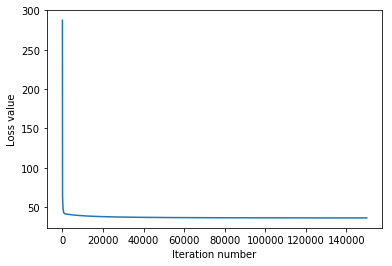

In [10]:
# Một chiến thuật debug hiệu quả được sử dụng đó là vẽ ra lịch sử mất mát (loss 
# history) như là một hàm với số lần lặp.
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [11]:
# Cài đặt hàm LinearRegression.predict đánh giá hiệu năng mô hình trên cả tập
# huấn luyện và tệp kiểm tra.
y_train_pred = clf.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_test_pred = clf.predict(X_test)
print('validation accuracy: %f' % (np.mean(y_test == y_test_pred), ))

training accuracy: 0.000000
validation accuracy: 0.000000


In [16]:
# Sử dụng tập kiểm tra để điều chỉnh các siêu tham số (độ lớn của reg và tỉ
# lệ học. Bạn nên thực nghiệm với nhiều khoảng giá trị của 2 siêu tham số này
# Nếu bạn đủ cẩn thận, bạn có thể đạt độ chính xác ... trên tập kiểm tra.
learning_rates = [1e-7, 5e-5]
regularization_strengths = [5e4, 1e5]

import sys

# kết quả là một từ điển ánh xạ từ tuple có dạng (reg, lr) sang tuple có dạng
# (train_acc, test_acc). Độ chính xác chỉ đơn giản là tỉ lệ mẫu dự đoán chính
# xác trên toàn tập dữ liệu.
results = {}
best_loss = sys.float_info.max   # Hiệu năng tốt nhất mà chúng ta sẽ đạt được.
best_linear = None # Mô hình LinearRegression có hiệu năng tốt nhất.

################################################################################
# TODO:                                                                        #
# Viết code chọn các siêu tham số tốt nhất bằng cách điều chỉnh trên tập kiểm  #
# tra. Với mỗi tổ hợp siêu tham số, huấn luyện một mô hình LinearRegression    #
# trên tập huấn luyện, tính toán độ chính xác trên tập huấn luyện và tập kiểm  #
# tra, và lưu những con số này vào từ điển kết quả. Thêm vào đó, lưu hiệu năng #
# tốt nhất trên tập kiểm tra vào best_val và mô hình LinearRegression tương    #
# ứng vào best_svm.                                                            #  
#                                                                              #
# Gợi ý: Bạn nên sử dụng số vòng lặp (num_iters) nhỏ khi xây dựng code kiểm    #
# tra để mô hình không mất quá nhiều thời gian để huấn luyện. Khi đã chắc chắn,#
# bạn nên trả về kết quả với số vòng lặp lớn                                   #
################################################################################

best_lr = 0
best_reg = 0

for reg in np.linspace(5e4, 1e5, 100):
    for lr in np.linspace(1e-7, 5e-5, 100):
        model = LinearRegression()
        model.train(X_train, y_train, lr, reg, num_iters=2000)
        
        loss, grad = model.loss(X_test, y_test, reg)
        if best_loss > loss:
            best_loss = loss
            best_lr = lr
            best_reg = reg
            
model = LinearRegression()
model.train(X_train, y_train, best_lr, best_reg, num_iters=20000)
loss, grad = model.loss(X_test, y_test, best_reg)
print(loss)

pass
################################################################################
#                              KẾT THÚC                                        #
################################################################################
    
# In kết quả
    # for lr, reg in sorted(results):
    #     train_accuracy, test_accuracy = results[(lr, reg)]
    #     print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
    #                 lr, reg, train_accuracy, test_accuracy))

    # print('best validation accuracy achieved during cross-validation: %f' % best_test)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
D:\ML\UET ML INT3405 1\week 4\models\linear_loss.py:78: RuntimeWarning: overflow encountered in square
  loss = (np.sum(diff ** 2) + reg * np.sum(W ** 2)) / (2 * N)
D:\ML\UET ML INT3405 1\week 4\models\linear_loss.py:78: RuntimeWarning: overflow encountered in double_scalars
  loss = (np.sum(diff ** 2) + reg * np.sum(W ** 2)) / (2 * N)
D:\ML\UET ML INT3405 1\week 4\models\linear_regression.py:43: RuntimeWarning: invalid value encountered in subtract
  self.W -= learning_rate * grad
D:\ML\UET ML INT3405 1\week 4\models\linear_loss.py:79: RuntimeWarning: overflow encountered in add
  dW = (np.dot(np.transpose(X), diff) + reg * W) / N


40.5691242345789


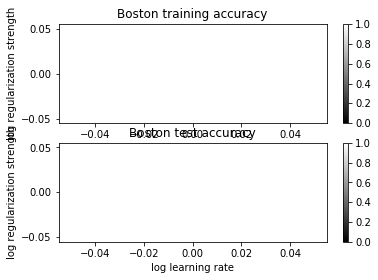

In [17]:
# Visualize kết quả kiểm thử chéo
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Boston training accuracy')

# vẽ hiệu năng trên tập kiểm tra
colors = [results[x][1] for x in results] # kích thước mặc định của marker là 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Boston test accuracy')
plt.show()